Question 1

Using the same data set as before, now try another model with these predictor variables: age, cholesterol and insurance type.  The data set can be downloaded here.

Enter the odds ratios for each predictor in the boxes below to two decimal places. Check whether each one is considered statistically significant at the conventional 5% threshold.   

In [1]:
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [12]:
df = read.csv(file = 'diabetes.csv')

In [3]:
head(df)

id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,insurance,fh,smoking,dm
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,...,59,NA,NA,29,38,720,1,0,3,no
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,...,68,NA,NA,46,48,360,0,0,2,no
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,...,92,185,92,49,57,180,2,0,2,no
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,...,50,NA,NA,33,38,480,1,0,3,no
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,...,80,NA,NA,44,41,300,0,0,3,yes
1008,248,94,69,3.6,4.81,Buckingham,34,male,71,...,86,NA,NA,36,42,195,1,0,1,no


In [4]:
str(df)

'data.frame':	403 obs. of  23 variables:
 $ id       : int  1000 1001 1002 1003 1005 1008 1011 1015 1016 1022 ...
 $ chol     : int  203 165 228 78 249 248 195 227 177 263 ...
 $ stab.glu : int  82 97 92 93 90 94 92 75 87 89 ...
 $ hdl      : int  56 24 37 12 28 69 41 44 49 40 ...
 $ ratio    : num  3.6 6.9 6.2 6.5 8.9 ...
 $ glyhb    : num  4.31 4.44 4.64 4.63 7.72 ...
 $ location : Factor w/ 2 levels "Buckingham","Louisa": 1 1 1 1 1 1 1 1 1 1 ...
 $ age      : int  46 29 58 67 64 34 30 37 45 55 ...
 $ gender   : Factor w/ 2 levels "female","male": 1 1 1 2 2 2 2 2 2 1 ...
 $ height   : int  62 64 61 67 68 71 69 59 69 63 ...
 $ weight   : int  121 218 256 119 183 190 191 170 166 202 ...
 $ frame    : Factor w/ 4 levels "","large","medium",..: 3 2 2 2 3 2 3 3 2 4 ...
 $ bp.1s    : int  118 112 190 110 138 132 161 NA 160 108 ...
 $ bp.1d    : int  59 68 92 50 80 86 112 NA 80 72 ...
 $ bp.2s    : int  NA NA 185 NA NA NA 161 NA 128 NA ...
 $ bp.2d    : int  NA NA 92 NA NA NA 112 NA 86 NA .

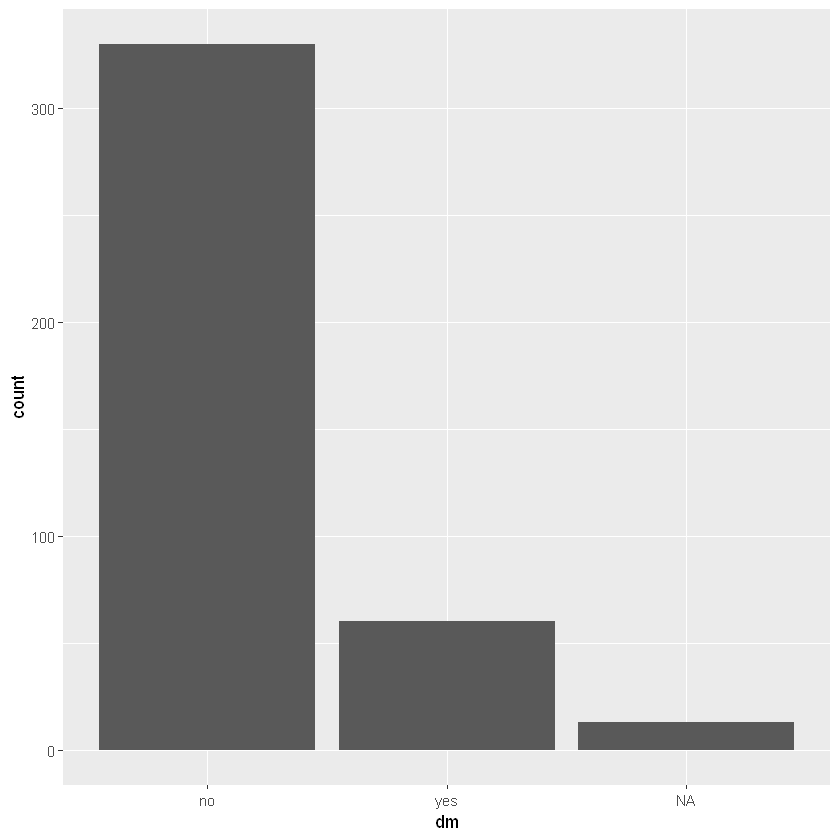

In [5]:
ggplot(df, aes(dm)) + geom_bar()

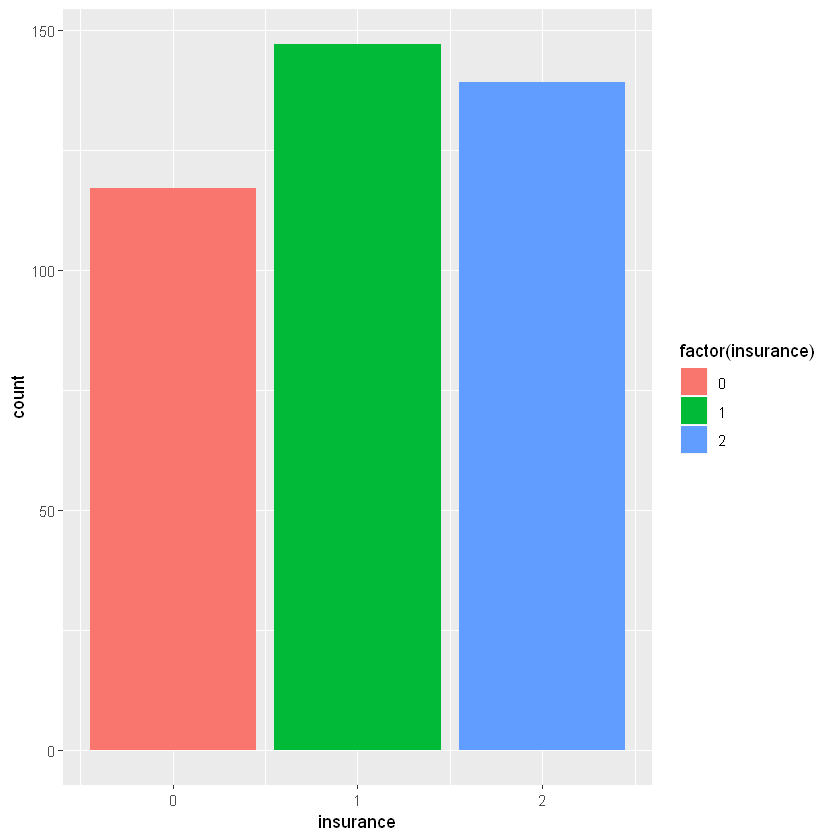

In [6]:
ggplot(df, aes(insurance)) + geom_bar(aes(fill=factor(insurance)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


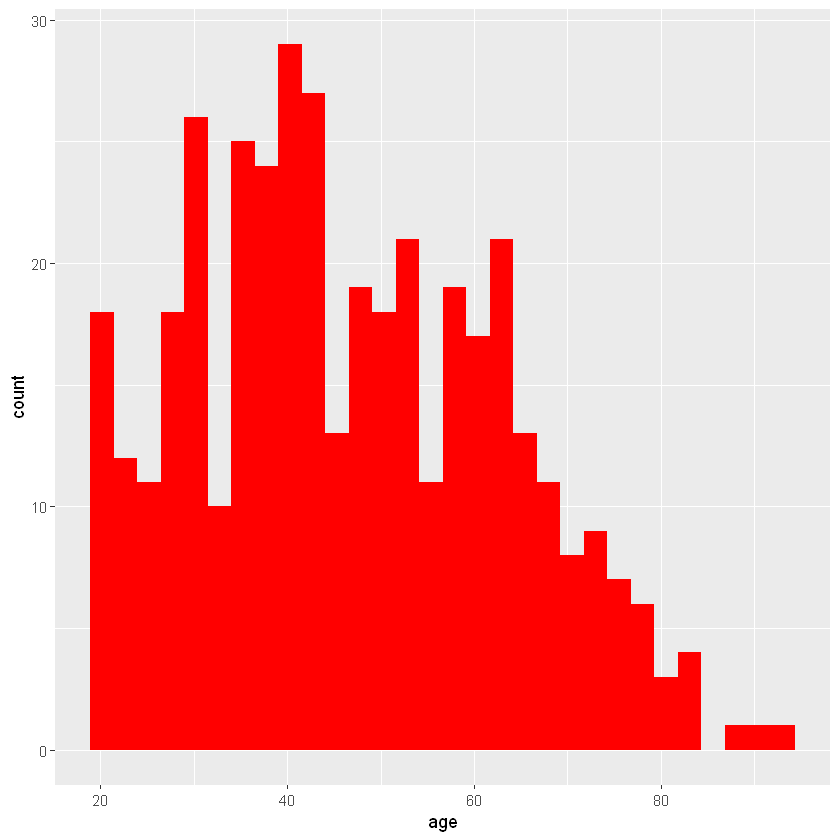

In [7]:
ggplot(df, aes(age)) + geom_histogram(fill='red')

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

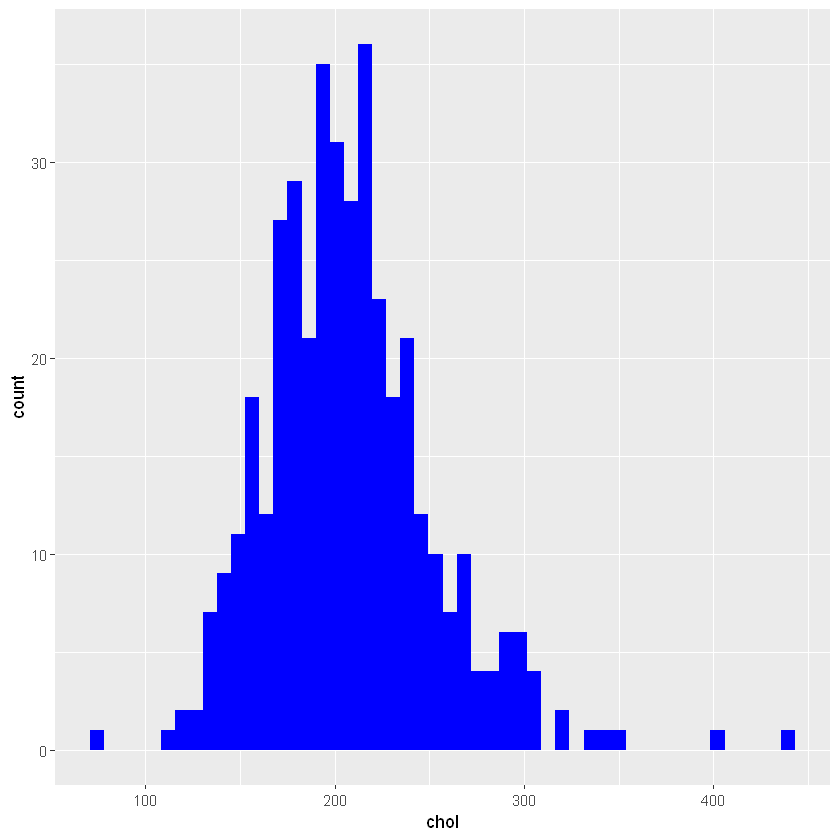

In [8]:
ggplot(df, aes(chol)) + geom_histogram(bins=50, fill='blue')

In [13]:
df = select(df, age, chol, insurance, dm)

In [15]:
head(df)

age,chol,insurance,dm
46,203,1,no
29,165,0,no
58,228,2,no
67,78,1,no
64,249,0,yes
34,248,1,no


In [16]:
str(df)

'data.frame':	403 obs. of  4 variables:
 $ age      : int  46 29 58 67 64 34 30 37 45 55 ...
 $ chol     : int  203 165 228 78 249 248 195 227 177 263 ...
 $ insurance: int  1 0 2 1 0 1 2 0 2 2 ...
 $ dm       : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...


In [17]:
df$insurance = factor(df$insurance)

In [18]:
str(df)

'data.frame':	403 obs. of  4 variables:
 $ age      : int  46 29 58 67 64 34 30 37 45 55 ...
 $ chol     : int  203 165 228 78 249 248 195 227 177 263 ...
 $ insurance: Factor w/ 3 levels "0","1","2": 2 1 3 2 1 2 3 1 3 3 ...
 $ dm       : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...


In [24]:
logmodel = glm(dm ~ .,family = binomial(link = 'logit'), data = df)

In [28]:
logmodel


Call:  glm(formula = dm ~ ., family = binomial(link = "logit"), data = df)

Coefficients:
(Intercept)          age         chol   insurance1   insurance2  
  -5.794252     0.049753     0.008402    -0.271955    -0.589803  

Degrees of Freedom: 388 Total (i.e. Null);  384 Residual
  (14 observations deleted due to missingness)
Null Deviance:	    334.5 
Residual Deviance: 289.3 	AIC: 299.3

In [29]:
summary(logmodel)


Call:
glm(formula = dm ~ ., family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5714  -0.5945  -0.3992  -0.2619   2.4399  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.794252   0.874555  -6.625 3.46e-11 ***
age          0.049753   0.009770   5.092 3.54e-07 ***
chol         0.008402   0.003153   2.665   0.0077 ** 
insurance1  -0.271955   0.359445  -0.757   0.4493    
insurance2  -0.589803   0.377434  -1.563   0.1181    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.54  on 388  degrees of freedom
Residual deviance: 289.28  on 384  degrees of freedom
  (14 observations deleted due to missingness)
AIC: 299.28

Number of Fisher Scoring iterations: 5


In [30]:
exp(-0.271955)

[1] 0.7618885

In [31]:
exp(-0.589803)

[1] 0.5544365

In [32]:
exp(0.049753)

[1] 1.051011

In [33]:
exp(0.008402)

[1] 1.008437